In [1]:
from bs4 import BeautifulSoup
import requests
import urllib
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pydot

In [2]:
def occurence(txt, pattern):
    count = 0
    flag = True
    start = 0
    txt = txt.lower()
    pattern = pattern.lower()
    while flag:
        i = txt.find(pattern, start) 
        if i == -1:
            flag = False
        else:
            count += 1        
            start = i + 1
    return count

def neighbors(txt, pattern1, pattern2, max_dist):
    count1 = 0
    flag = True
    start = 0
    txt = txt.lower()
    pattern1 = pattern1.lower()
    pos1 = []
    while flag:
        i = txt.find(pattern1, start) 
        if i == -1:
            flag = False
        else:
            count1 += 1        
            start = i + 1
            pos1.append(i)

    count2 = 0
    flag = True
    start = 0
    txt = txt.lower()
    pattern2 = pattern2.lower()
    pos2 = []
    while flag:
        i = txt.find(pattern2, start) 
        if i == -1:
            flag = False
        else:
            count2 += 1        
            start = i + 1
            pos2.append(i)
    cross_counter = 0
    for p1 in pos1:
        for p2 in pos2:
            if np.abs(p1-p2) <= max_dist:
                cross_counter += 1
    return cross_counter // 2

In [3]:
countries = np.array(['States', 'Saudi', 'Russia', 'China', 'Canada',
             'Iraq', 'Iran', 'Emirates', 'Brazil', 'Kuwait', 
             'Mexico', 'Venezuela', 'Norway', 'Qatar', 'Nigeria', 
             'Nigeria', 'Angola', 'Algeria', 'Kazakhstan', 'Kingdom',
             'India', 'Oman', 'Indonesia', 'Colombia', 'Azerbaijan',
             'Malaysia', 'Argentina', 'Egypt', 'Ecuador', 'Thailand',
             'Libya', 'Australia', 'Turkmenistan', 'Equatorial', 'Germany',
             'Gabon', 'Congo', 'Sudan', 'Italy', 'Denmark',
             'Peru', 'South Africa', 'France', 'Japan', 'Brunei',
             'Chad', 'Korea', 'Sudan', 'Ghana', 'Trinidad',
             'Romania', 'Cameroon', 'Pakistan', 'Bolivia', 'Spain',
             'Uzbekistan', 'Netherlands', 'Turkey', 'Bahrain', 'Papua',
             'Ukraine', 'Poland', 'Ivoire', 'Cuba', 'Timor', 
             'New Zealand', 'Singapore', 'Tunisia', 'Hungary', 'Syria',
             'Philippines', 'Belarus', 'Taiwan', 'Austria', 'Belgium',
             'Mongolia', 'Serbia', 'Albania', 'Yemen', 'Congo',
             'Croatia', 'Suriname', 'Estonia', 'Greece', 'Myanmar',
             'Czech', 'Niger', 'Portugal', 'Chile', 'Finland',
             'Slovakia', 'Sweden', 'Guatemala', 'Lithuania', 'Israel',
             'Bulgaria', 'Mauritania', 'Paraguay', 'Bangladesh', 'Uruguay'
             'Belize', 'Costa', 'Switzerland', 'Latvia', 'Barbados',
             'Kyrgyzstan', 'Kenya', 'Zimbabwe', 'Eswatini', 'Jamaica',
             'Mauritius', 'Malawi', 'Panama', 'Jordan', 'Georgia', 
             'Ethiopia', 'Ireland', 'Mozambique', 'Bosnia', 'Macedonia'])

In [4]:
base_url = 'https://oilprice.com'
#base_url = 'https://www.worldometers.info/oil/oil-production-by-country/'
resp = requests.get(base_url, auth=('user', 'pass'))
soup = BeautifulSoup(resp.content, 'html.parser')

all_links = soup.find_all('a')

links = []

for i in range(len(all_links)):
    try:
        curr_link = all_links[i]['href']
        if 'https' in curr_link:
            links.append(curr_link)
    except KeyError:
        pass
        

#links = [tag['href'] for tag in soup.find_all('a')]

all_data = list()
my_dict = dict()
for link in np.unique(links):
    page_data = dict()
    if 'linkedin' in link:
        continue
    print('requesting page with URL: '+link)
    news_page = requests.get(link)
    page_soup = BeautifulSoup(news_page.text, 'html.parser')
    #if 'header' in page_data:
    try:
        page_data['header'] = page_soup.title.string
        page_data['text'] = page_soup.get_text()
        page_data['url'] = link
        all_data.append(page_data)
    except AttributeError:
        pass

requesting page with URL: https://community.oilprice.com/
requesting page with URL: https://community.oilprice.com/discover/
requesting page with URL: https://community.oilprice.com/forum/63-energy-general/
requesting page with URL: https://community.oilprice.com/forum/70-oil-stocks-prices/
requesting page with URL: https://community.oilprice.com/forum/76-other-energy-topics/
requesting page with URL: https://community.oilprice.com/topic/23356-green-new-deal-blizzard-of-lies/
requesting page with URL: https://community.oilprice.com/topic/24201-nordstream2/
requesting page with URL: https://community.oilprice.com/topic/24506-big-bounce-russian-gas-amid-market-tightness-new-report-by-oxford-institute-for-energy-studies/
requesting page with URL: https://community.oilprice.com/topic/24877-ukrainian-maidan-after-8-years/
requesting page with URL: https://community.oilprice.com/topic/24879-hunter-biden-helped-china-gain-control-of-cobalt-mines-in-africa/
requesting page with URL: https://co

requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/India-Launches-Biggest-Its-Biggest-Ever-Oil-Tender.html
requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/India-To-Consider-Stopping-New-Coal-Plants-Construction.html
requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/Libya-Declares-Force-Majeure-On-Crude-Oil-Exports.html
requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/Libyas-Election-Chaos-Threatens-Oil-Production-And-Exports.html
requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/Lukoil-Heres-How-Oil-Could-Hit-380-Per-Barrel-In-2050.html
requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/Mexico-May-Give-Pemex-Yet-Another-Tax-Break.html
requesting page with URL: https://oilprice.com/Latest-Energy-News/World-News/Mixed-API-Inventory-Data-Has-Little-Impact-On-Oil-Prices.html
requesting page with URL: https://oilprice.com/Latest-E

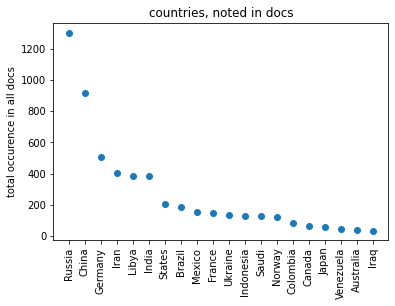

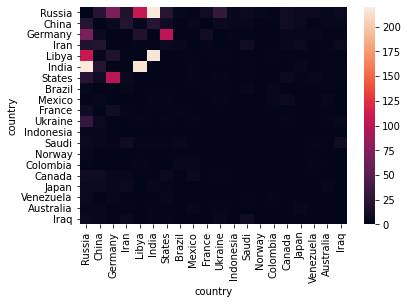

In [5]:
counter = np.zeros((len(countries)))

for number in range(len(all_data)):
    doc = all_data[number]['text']
    for i, cntr in enumerate(countries):
        counter[i] += occurence(doc, cntr)

max_number = 20
max_dist = 200
threshold = 2


idx = np.argsort(-counter)
cross_counter = np.zeros((len(countries[:max_number]), len(countries[:max_number])))
countries = countries[idx]
counter = counter[idx] 
for number in range(len(all_data)):
    doc = all_data[number]['text']
    for i, cntr1 in enumerate(countries[:max_number]):
        for j, cntr2 in enumerate(countries[:max_number]):
            if i == j:
                continue
            cross_notation = neighbors(doc, cntr1, cntr2, max_dist) > 0
            cross_counter[i, j] += cross_notation
            cross_counter[j, i] += cross_notation

plt.close('all')

plt.scatter(np.arange(len(countries[:max_number])), counter[:max_number])
plt.title('countries, noted in docs')
plt.xticks(np.arange(len(countries[:max_number])), countries[:max_number], rotation=90)
plt.ylabel('total occurence in all docs')

plt.figure()
sns.heatmap(cross_counter)
plt.xticks(np.arange(len(countries[:max_number]))+0.5, countries[:max_number], rotation=90)
plt.yticks(np.arange(len(countries[:max_number]))+0.5, countries[:max_number], rotation=0)
plt.xlabel('country')
plt.ylabel('country')
plt.show()

In [6]:
G = pydot.Dot(graph_type='graph')

for i in range(len(countries[:max_number])):
    G.add_node(pydot.Node(str(countries[idx][i]), shape='rectangle', fontcolor='red', fontsize=48))
    for j in range(i+1, len(countries[:max_number])):
        if cross_counter[i, j] > threshold:
            G.add_node(pydot.Node(str(countries[idx][j]), shape='rectangle', fontcolor='red', fontsize=48))
            G.add_edge(pydot.Edge(str(countries[idx][i]), str(countries[idx][j])))

In [7]:
header = ['Information is taken from website '+ base_url+'and links from it']
note1 = ['All texts in links are analyzed to check frequency of different coutnries in their. It reflects their influence on the oil price']
note2 = ['All texts in links are analyzed to check wether some coutnries are met together (at a small distance) in tdifferent texts to verify their mutual influence on the oil price']

In [8]:
notation = dict()
for i in range(len(countries)):
    notation[countries[i]] = counter[i]

In [9]:
mutual_notation = dict()
for i in range(len(cross_counter[:max_number])):
    curr_dict = dict()
    for j in range(len(countries[:max_number])):
        if cross_counter[i, j] > 0:
            curr_dict[countries[j]] = cross_counter[i, j]
    mutual_notation[countries[i]] = curr_dict

In [10]:
output = header + note1 + [notation] + note2 + [mutual_notation]

In [11]:
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(output, f, ensure_ascii=False, indent=4)